In [1]:
import os
os.chdir('./musicautobot')

In [2]:
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *

In [3]:
# I had to do this on my mac (regards, Greg)
music21.environment.set(
    "musescoreDirectPNGPath",
    "/Applications/MuseScore 3.app/Contents/MacOS/mscore"
)

# Generate Music with Pretrained Model

### Load Pretrained

In [7]:
# Location of midi primers
midi_path = Path("../primers")
# midi_path = Path("data/midi/spirituals")

# Location of saved datset
data_path = Path('data/numpy')

# Data path
data = MusicDataBunch.empty(data_path)

# Path to pretrained model
pretrained_path = Path("../transfer_model.pth")

In [26]:
# Learner
config = default_config()
learn = music_model_learner(data, pretrained_path=pretrained_path, config=config.copy())

## Prediction

#### Choose existing midi file as a starting point

In [8]:
midi_files = get_files(midi_path, recurse=True, extensions='.mid'); midi_files
# midi_files = get_files(midi_path, recurse=True, extensions=".mid"); midi_files

[PosixPath('../primers/roll_jordan_primer.mid'),
 PosixPath('../primers/americana_primer_2.mid'),
 PosixPath('../primers/americana_primer_3.mid'),
 PosixPath('../primers/americana_primer_4.mid'),
 PosixPath('../primers/americana_primer_5.mid'),
 PosixPath('../primers/fur_elise.mid')]

In [9]:
idx = 0
f = midi_files[idx]; f

PosixPath('../primers/roll_jordan_primer.mid')

#### NextWord/Autocomplete

Trim the song to only a few notes. Model will use these notes a seed and continue the idea

In [16]:
cutoff_beat = 10

item = MusicItem.from_file(f, data.vocab)
seed_item = item.trim_to_beat(cutoff_beat)

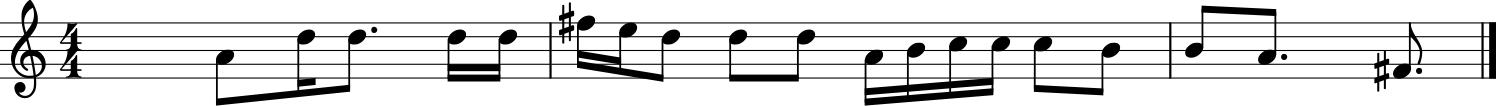

In [17]:
seed_item.show()

In [18]:
seed_item.play()

#### Use seed to predict next sequence

In [27]:
note_temp = 1.2
dur_temp = 1.5
pred, full = learn.predict(
    seed_item,
    n_words=401,
    temperatures=(note_temp,dur_temp),
    min_bars=12,
    top_k=24,
    top_p=0.7
)

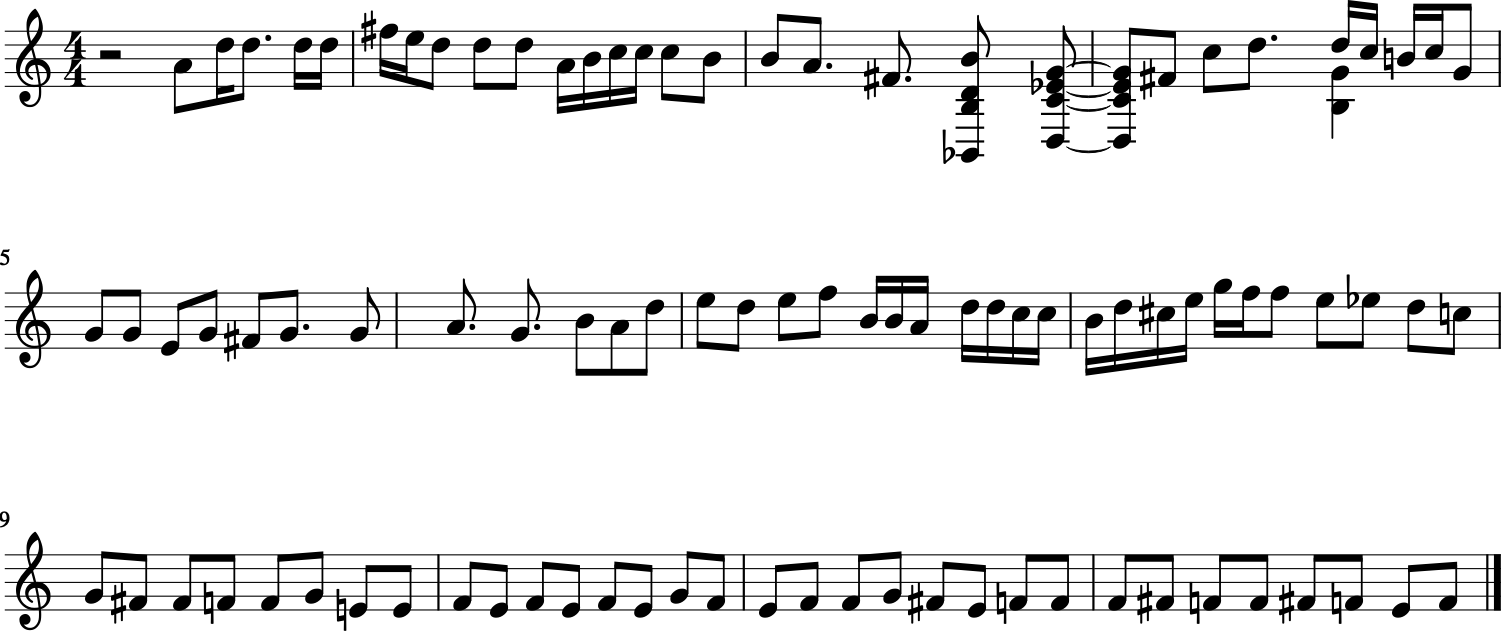

In [28]:
full.show()

In [29]:
full.play()

In [ ]:
# Save
full.to_stream().write("midi", fp="./transfer_generated.mid")

### Predict without primer

In [ ]:
empty_item = MusicItem.empty(vocab)

In [ ]:
pred, full = learn.predict(empty_item, n_words=500)

In [ ]:
pred.show()